# Linear Regression Project

-Shreejaya Bharathan and Aakanksha Nallabothula Surya

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.cm as cm
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import f_regression
from statsmodels.stats.anova import anova_lm

## Dataset 
https://www.kaggle.com/uciml/student-alcohol-consumption

In [2]:
student_data = pd.read_csv('./student-mat.csv')

In [3]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Test train split

In [4]:
### creating a subset of data for prediction 
test_data = student_data.sample(n=10)
print(list(test_data.index))
### updating the training data
student_data = student_data.drop(list(test_data.index))
student_data.shape

[162, 288, 144, 17, 119, 211, 263, 88, 218, 206]


(385, 33)

#### Selecting variables of intereset for our research

In [5]:
student_data = student_data[['sex','famsize','Pstatus','famsup','studytime','failures','romantic','goout','absences','Dalc','traveltime','paid','schoolsup', 'G3']]

In [6]:
student_data.shape

(385, 14)

In [7]:
features = student_data.drop('G3',axis=1)

In [8]:
features.columns

Index(['sex', 'famsize', 'Pstatus', 'famsup', 'studytime', 'failures',
       'romantic', 'goout', 'absences', 'Dalc', 'traveltime', 'paid',
       'schoolsup'],
      dtype='object')

## Explanatory Analysis

### Scatter plots 

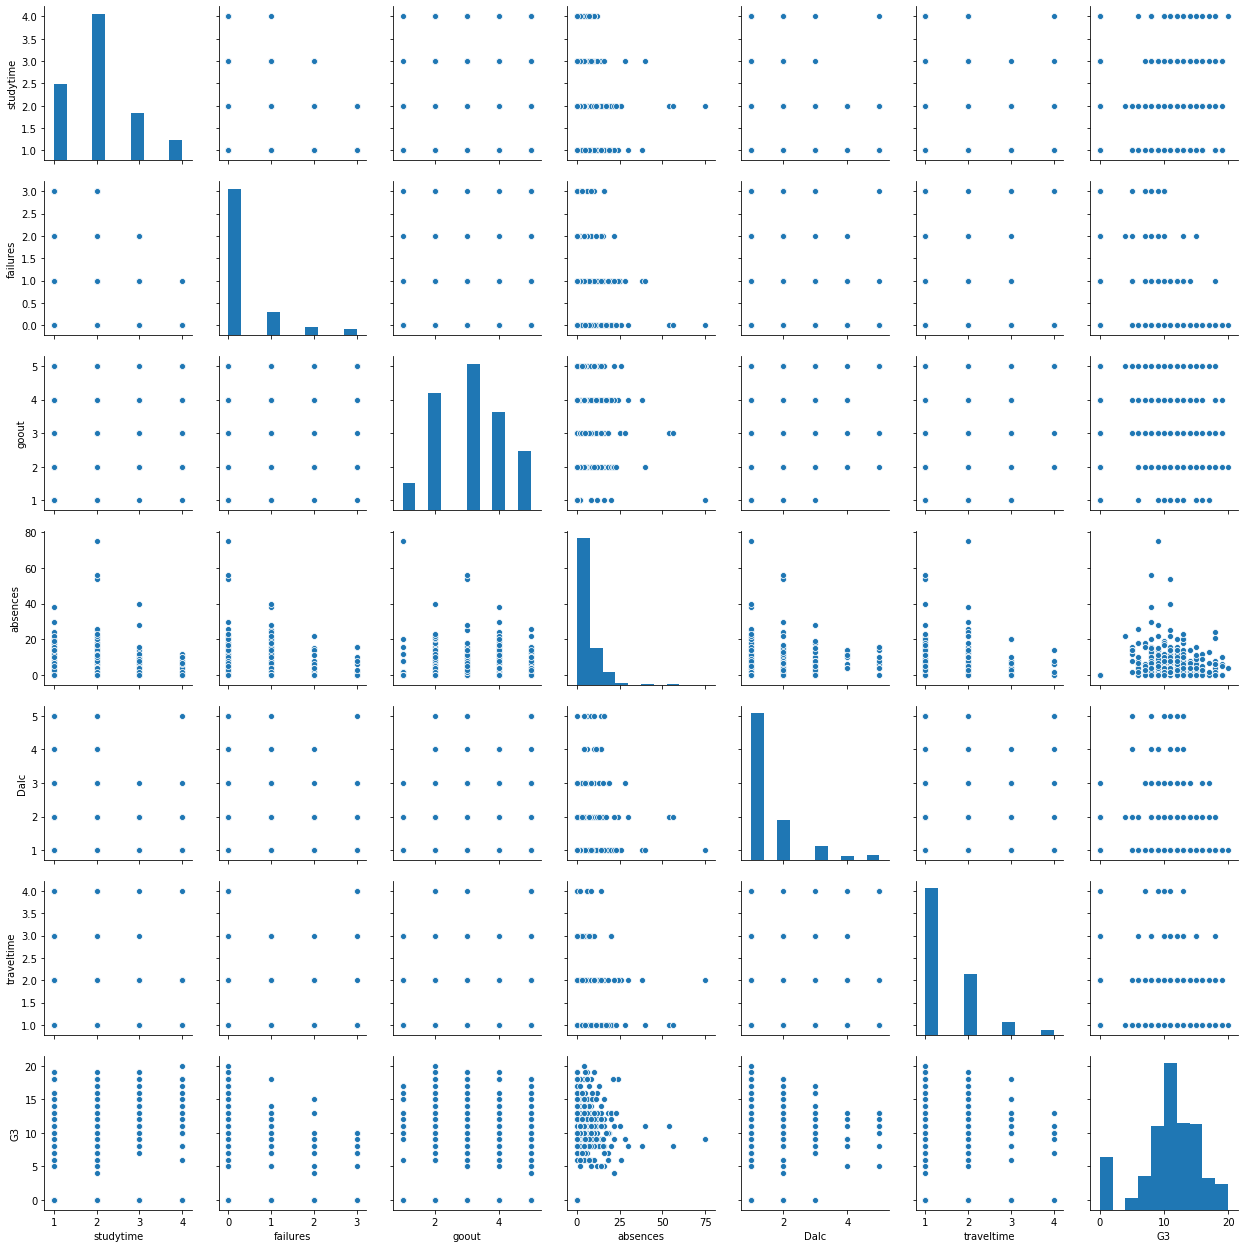

In [9]:
## pairplot

import seaborn as sn
sn.pairplot(student_data)

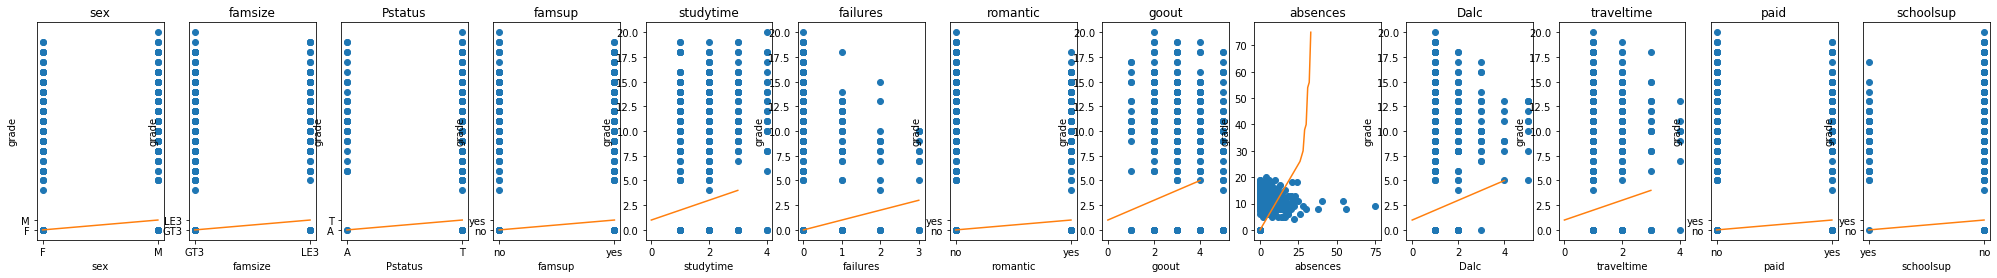

In [10]:
#scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(35, 4))


# i: index
for i, col in enumerate(features.columns):
    plt.subplot(1, 13, i+1)
    x = features[col]
    y = student_data['G3']
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('grade')

### Correlation matrix

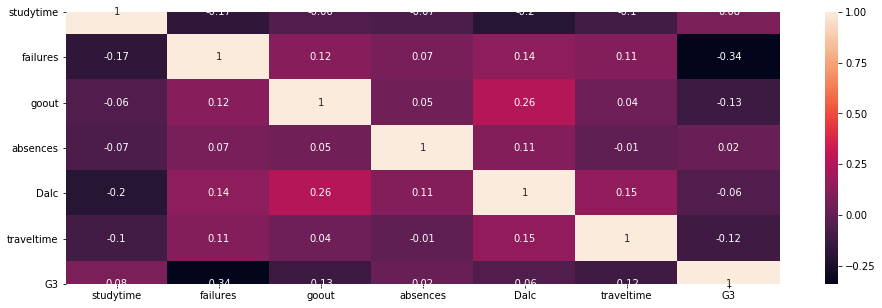

In [11]:
#correlation
import seaborn as sns
correlation_matrix = student_data.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

## Regression Analysis

### FULL MODEL

In [12]:
reg = smf.ols('G3~  C(sex) + C(famsize) + C(Pstatus) + C(traveltime) + C(studytime)+failures +C(schoolsup)+ C(famsup)+C(paid)+ C(romantic) + C(goout) + C(Dalc) +absences', data = student_data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     4.298
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           7.55e-10
Time:                        21:15:26   Log-Likelihood:                -1083.9
No. Observations:                 385   AIC:                             2216.
Df Residuals:                     361   BIC:                             2311.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.1743      1.246      8.965      0.000       8.723      13.625
C(sex)[T.M]             1.3332      0.483      2.761      0.006       0.384       2.283
C(famsize)[T.LE3]       0.9922      0.494      2.009      0.045       0.021       1.963
C(Pstatus)[T.T]        -0.7757      0.724     -1.072      0.285      -2.199       0.648
C(traveltime)[T.2]     -0.8875      0.495     -1.794      0.074      -1.860       0.085
C(traveltime)[T.3]     -0.6220      0.965     -0.645      0.519      -2.519       1.275
C(traveltime)[T.4]     -0.7846      1.591     -0.493      0.622      -3.914       2.344
C(studytime)[T.2]      -0.0649      0.559     -0.116      0.908      -1.165       1.035
C(studytime)[T.3]       1.4569      0.757      1.926      0.055      -0.031       2.945
C(studytime)[T.4]       0.3176      0.954      0.333      0.739      -1.559       2.194
C(schoolsup)[T.yes]    -0.9905      0.655     -1.512      0.131      -2.279       0.298
C(famsup)[T.yes]       -0.5932      0.474     -1.252      0.211      -1.525       0.338
C(paid)[T.yes]          0.7064      0.478      1.478      0.140      -0.234       1.646
C(romantic)[T.yes]     -1.3477      0.473     -2.849      0.005      -2.278      -0.417
C(goout)[T.2]           0.9878      0.992      0.996      0.320      -0.963       2.939
C(goout)[T.3]           0.3858      0.974      0.396      0.692      -1.529       2.301
C(goout)[T.4]          -0.2518      1.012     -0.249      0.804      -2.242       1.738
C(goout)[T.5]          -0.3911      1.096     -0.357      0.722      -2.547       1.765
C(Dalc)[T.2]           -1.0081      0.581     -1.737      0.083      -2.150       0.134
C(Dalc)[T.3]           -0.4782      0.928     -0.515      0.607      -2.304       1.348
C(Dalc)[T.4]           -1.5312      1.583     -0.967      0.334      -4.644       1.581
C(Dalc)[T.5]            0.7646      1.522      0.502      0.616      -2.229       3.758
failures               -1.8011      0.316     -5.702      0.000      -2.422      -1.180
absences                0.0533      0.027      1.942      0.053      -0.001       0.107
==============================================================================
Omnibus:                       24.731   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.630
Skew:                          -0.633   Prob(JB):                     1.00e-06
Kurtosis:                       3.344   Cond. No.                         97.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### INDIVIDUAL T tests

## sex

p-value close to 0.05 => significant

In [13]:
reg_sex = smf.ols('G3~ C(sex)', data=student_data).fit()
reg_sex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.690
Date:                Sun, 13 Oct 2019   Prob (F-statistic):             0.0310
Time:                        21:15:26   Log-Likelihood:                -1128.1
No. Observations:                 385   AIC:                             2260.
Df Residuals:                     383   BIC:                             2268.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.9951      0.318     31.415      0.000       9.370      10.621
C(sex)[T.M]     1.0049      0.464      2.166      0.031       0.093       1.917
==============================================================================
Omnibus:                       31.071   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.218
Skew:                          -0.725   Prob(JB):                     1.37e-08
Kurtosis:                       3.394   Cond. No.                         2.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## famsize

p-value > 0.05 => not significant

In [14]:
reg_famsize = smf.ols('G3~ C(famsize)', data=student_data).fit()
reg_famsize.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.859
Date:                Sun, 13 Oct 2019   Prob (F-statistic):             0.0917
Time:                        21:15:26   Log-Likelihood:                -1129.0
No. Observations:                 385   AIC:                             2262.
Df Residuals:                     383   BIC:                             2270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.2161      0.276     37.058      0.000       9.674      10.758
C(famsize)[T.LE3]     0.8642      0.511      1.691      0.092      -0.141       1.869
==============================================================================
Omnibus:                       29.726   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.349
Skew:                          -0.708   Prob(JB):                     3.48e-08
Kurtosis:                       3.366   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Pstatus
p-value > 0.05 => not-significant

In [15]:
reg_pstatus = smf.ols('G3~ C(Pstatus)', data=student_data).fit()
reg_pstatus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.486
Date:                Sun, 13 Oct 2019   Prob (F-statistic):              0.224
Time:                        21:15:26   Log-Likelihood:                -1129.7
No. Observations:                 385   AIC:                             2263.
Df Residuals:                     383   BIC:                             2271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.3000      0.721     15.662      0.000       9.881      12.719
C(Pstatus)[T.T]    -0.9290      0.762     -1.219      0.224      -2.428       0.570
==============================================================================
Omnibus:                       31.068   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.217
Skew:                          -0.726   Prob(JB):                     1.37e-08
Kurtosis:                       3.385   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## traveltime
p-value > 0.05 so not significant

In [16]:
reg_travel = smf.ols('G3~ C(traveltime)', data=student_data).fit()
reg_travel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.752
Date:                Sun, 13 Oct 2019   Prob (F-statistic):              0.156
Time:                        21:15:26   Log-Likelihood:                -1127.8
No. Observations:                 385   AIC:                             2264.
Df Residuals:                     381   BIC:                             2279.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.8167      0.287     37.642      0.000      10.252      11.382
C(traveltime)[T.2]    -0.7975      0.531     -1.502      0.134      -1.841       0.246
C(traveltime)[T.3]    -1.5895      1.012     -1.570      0.117      -3.580       0.401
C(traveltime)[T.4]    -2.0667      1.635     -1.264      0.207      -5.282       1.148
==============================================================================
Omnibus:                       31.956   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.466
Skew:                          -0.737   Prob(JB):                     7.32e-09
Kurtosis:                       3.406   Cond. No.                         7.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## studytime
p-value close to 0.05 so significant

In [17]:
reg_studytime = smf.ols('G3~ C(studytime)', data=student_data).fit()
reg_studytime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.497
Date:                Sun, 13 Oct 2019   Prob (F-statistic):              0.215
Time:                        21:15:26   Log-Likelihood:                -1128.2
No. Observations:                 385   AIC:                             2264.
Df Residuals:                     381   BIC:                             2280.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.2376      0.453     22.577      0.000       9.346      11.129
C(studytime)[T.2]    -0.0624      0.559     -0.112      0.911      -1.162       1.037
C(studytime)[T.3]     1.1592      0.732      1.584      0.114      -0.279       2.598
C(studytime)[T.4]     1.0216      0.987      1.035      0.301      -0.920       2.963
==============================================================================
Omnibus:                       34.972   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.849
Skew:                          -0.768   Prob(JB):                     8.18e-10
Kurtosis:                       3.498   Cond. No.                         5.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## failures
p-value <0.05 => significant

In [18]:
reg_failures = smf.ols('G3~ failures', data=student_data).fit()
reg_failures.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     51.53
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           3.70e-12
Time:                        21:15:26   Log-Likelihood:                -1106.2
No. Observations:                 385   AIC:                             2216.
Df Residuals:                     383   BIC:                             2224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1656      0.239     46.639      0.000      10.695      11.636
failures      -2.1675      0.302     -7.178      0.000      -2.761      -1.574
==============================================================================
Omnibus:                       34.082   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.745
Skew:                          -0.743   Prob(JB):                     1.42e-09
Kurtosis:                       3.578   Cond. No.                         1.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## schoolsup
p-value > 0.05 so not significant

In [19]:
reg_schoolsup = smf.ols('G3~ C(schoolsup)', data=student_data).fit()
reg_schoolsup.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.041
Date:                Sun, 13 Oct 2019   Prob (F-statistic):             0.0820
Time:                        21:15:26   Log-Likelihood:                -1128.9
No. Observations:                 385   AIC:                             2262.
Df Residuals:                     383   BIC:                             2270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.6239      0.249     42.699      0.000      10.135      11.113
C(schoolsup)[T.yes]    -1.2039      0.690     -1.744      0.082      -2.561       0.154
==============================================================================
Omnibus:                       37.471   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.592
Skew:                          -0.799   Prob(JB):                     1.26e-10
Kurtosis:                       3.537   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## famsup
p-value > 0.05 so not significant

In [20]:
reg_famsup = smf.ols('G3~ C(famsup)', data=student_data).fit()
reg_famsup.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5659
Date:                Sun, 13 Oct 2019   Prob (F-statistic):              0.452
Time:                        21:15:26   Log-Likelihood:                -1130.2
No. Observations:                 385   AIC:                             2264.
Df Residuals:                     383   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.6892      0.376     28.464      0.000       9.951      11.428
C(famsup)[T.yes]    -0.3601      0.479     -0.752      0.452      -1.301       0.581
==============================================================================
Omnibus:                       31.836   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.295
Skew:                          -0.733   Prob(JB):                     7.97e-09
Kurtosis:                       3.418   Cond. No.                         2.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## paid
p-value < 0.05 => significant

In [21]:
reg_paid = smf.ols('G3~ C(paid)', data=student_data).fit()
reg_paid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.457
Date:                Sun, 13 Oct 2019   Prob (F-statistic):             0.0638
Time:                        21:15:26   Log-Likelihood:                -1128.7
No. Observations:                 385   AIC:                             2261.
Df Residuals:                     383   BIC:                             2269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.0718      0.315     31.991      0.000       9.453      10.691
C(paid)[T.yes]     0.8657      0.466      1.859      0.064      -0.050       1.781
==============================================================================
Omnibus:                       26.445   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.901
Skew:                          -0.662   Prob(JB):                     3.21e-07
Kurtosis:                       3.333   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## romantic
p-value < 0.05 => significant

In [22]:
reg_romantic = smf.ols('G3~ C(romantic)', data=student_data).fit()
reg_romantic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.175
Date:                Sun, 13 Oct 2019   Prob (F-statistic):            0.00448
Time:                        21:15:26   Log-Likelihood:                -1126.4
No. Observations:                 385   AIC:                             2257.
Df Residuals:                     383   BIC:                             2265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.9409      0.284     38.544      0.000      10.383      11.499
C(romantic)[T.yes]    -1.3913      0.487     -2.859      0.004      -2.348      -0.435
==============================================================================
Omnibus:                       28.667   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.975
Skew:                          -0.703   Prob(JB):                     6.91e-08
Kurtosis:                       3.285   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## goout
p-value > 0.05 => not significant

In [23]:
reg_goout = smf.ols('G3~ C(goout)', data=student_data).fit()
reg_goout.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.947
Date:                Sun, 13 Oct 2019   Prob (F-statistic):             0.0202
Time:                        21:15:26   Log-Likelihood:                -1124.6
No. Observations:                 385   AIC:                             2259.
Df Residuals:                     380   BIC:                             2279.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.8696      0.943     10.471      0.000       8.016      11.723
C(goout)[T.2]     1.3483      1.044      1.291      0.198      -0.705       3.402
C(goout)[T.3]     1.1463      1.025      1.118      0.264      -0.869       3.162
C(goout)[T.4]    -0.1553      1.064     -0.146      0.884      -2.247       1.936
C(goout)[T.5]    -0.7323      1.135     -0.645      0.519      -2.965       1.500
==============================================================================
Omnibus:                       32.492   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.328
Skew:                          -0.728   Prob(JB):                     4.76e-09
Kurtosis:                       3.518   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Dalc
p-value < 0.05 => significant

In [24]:
reg_dalc = smf.ols('G3~ C(Dalc)', data=student_data).fit()
reg_dalc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.378
Date:                Sun, 13 Oct 2019   Prob (F-statistic):              0.241
Time:                        21:15:26   Log-Likelihood:                -1127.7
No. Observations:                 385   AIC:                             2265.
Df Residuals:                     380   BIC:                             2285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.7732      0.278     38.774      0.000      10.227      11.320
C(Dalc)[T.2]    -1.3623      0.601     -2.265      0.024      -2.545      -0.180
C(Dalc)[T.3]    -0.2732      0.936     -0.292      0.770      -2.113       1.567
C(Dalc)[T.4]    -1.2732      1.635     -0.779      0.437      -4.488       1.941
C(Dalc)[T.5]    -0.1066      1.544     -0.069      0.945      -3.143       2.930
==============================================================================
Omnibus:                       33.086   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.082
Skew:                          -0.748   Prob(JB):                     3.26e-09
Kurtosis:                       3.443   Cond. No.                         7.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## absences
p-value > 0.05 => not significant

In [25]:
reg_absences = smf.ols('G3~ absences', data=student_data).fit()
reg_absences.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2280
Date:                Sun, 13 Oct 2019   Prob (F-statistic):              0.633
Time:                        21:15:26   Log-Likelihood:                -1130.4
No. Observations:                 385   AIC:                             2265.
Df Residuals:                     383   BIC:                             2273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3887      0.286     36.384      0.000       9.827      10.950
absences       0.0138      0.029      0.477      0.633      -0.043       0.071
==============================================================================
Omnibus:                       29.322   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.801
Skew:                          -0.705   Prob(JB):                     4.57e-08
Kurtosis:                       3.349   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Significant variables : sex, failures, paid, romantic, Dalc, studytime

In [26]:
reg_chosen = smf.ols('G3~ C(sex) + failures + C(paid) + C(romantic) + C(Dalc) + C(studytime)', data=student_data).fit()
reg_chosen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     6.738
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           2.45e-10
Time:                        21:15:26   Log-Likelihood:                -1095.6
No. Observations:                 385   AIC:                             2215.
Df Residuals:                     373   BIC:                             2263.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.5219      0.624     16.856      0.000       9.294      11.749
C(sex)[T.M]            1.4487      0.479      3.027      0.003       0.508       2.390
C(paid)[T.yes]         0.5122      0.459      1.115      0.265      -0.391       1.415
C(romantic)[T.yes]    -1.0265      0.469     -2.188      0.029      -1.949      -0.104
C(Dalc)[T.2]          -1.0109      0.576     -1.755      0.080      -2.143       0.122
C(Dalc)[T.3]          -0.1847      0.905     -0.204      0.838      -1.965       1.595
C(Dalc)[T.4]          -1.2431      1.563     -0.795      0.427      -4.316       1.830
C(Dalc)[T.5]           0.0424      1.465      0.029      0.977      -2.839       2.924
C(studytime)[T.2]     -0.0390      0.555     -0.070      0.944      -1.131       1.053
C(studytime)[T.3]      1.4184      0.744      1.907      0.057      -0.044       2.881
C(studytime)[T.4]      0.2389      0.955      0.250      0.803      -1.639       2.117
failures              -1.9267      0.315     -6.116      0.000      -2.546      -1.307
==============================================================================
Omnibus:                       32.061   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.719
Skew:                          -0.722   Prob(JB):                     6.45e-09
Kurtosis:                       3.517   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Significant variables : sex, failures, romantic, studytime

In [27]:
reg_full_model = smf.ols('G3~ C(sex) + failures + C(romantic) + C(studytime)', data=student_data).fit()
reg_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     11.67
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           5.25e-12
Time:                        21:15:26   Log-Likelihood:                -1097.7
No. Observations:                 385   AIC:                             2209.
Df Residuals:                     378   BIC:                             2237.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.5740      0.579     18.271      0.000       9.436      11.712
C(sex)[T.M]            1.3041      0.464      2.811      0.005       0.392       2.216
C(romantic)[T.yes]    -1.0021      0.466     -2.152      0.032      -1.918      -0.086
C(studytime)[T.2]      0.0191      0.545      0.035      0.972      -1.052       1.091
C(studytime)[T.3]      1.5086      0.733      2.059      0.040       0.068       2.949
C(studytime)[T.4]      0.4646      0.943      0.493      0.623      -1.390       2.319
failures              -2.0732      0.304     -6.811      0.000      -2.672      -1.475
==============================================================================
Omnibus:                       33.422   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.688
Skew:                          -0.739   Prob(JB):                     2.41e-09
Kurtosis:                       3.537   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
anova_model_full = sm.stats.anova_lm(reg_full_model, typ=1)
anova_model_full

,df,sum_sq,mean_sq,F,PR(>F)
C(sex),1.0,96.849058,96.849058,5.419937,2.043504e-02
C(romantic),1.0,143.155701,143.155701,8.011383,4.896685e-03
C(studytime),3.0,182.370753,60.790251,3.401988,1.786632e-02
failures,1.0,828.972569,828.972569,46.391563,3.826003e-11
Residual,378.0,6754.496075,17.869037,NaN,NaN


## Model Selection -  Best Subset Selection

### Mallow's Cp Calculation

In [29]:
MSE_p = reg_full_model.ssr/(395-7)

In [30]:
## Mallow's Cp
def Cp_calc(SSE,k):
    n = 395    
    Cp = (SSE/MSE_p)+ 2*(k+1) -n 
    return Cp

### Model 1 - no predictors
G3 ~ constant

In [31]:
student_data['null'] = 1
reg_model_1 = smf.ols('G3~ null', data = student_data).fit()

Cp_model_1 = Cp_calc(reg_model_1.ssr,0)
model_1 = [0,reg_model_1.rsquared, reg_model_1.rsquared_adj, Cp_model_1, 'none', reg_model_1.aic, reg_model_1.bic]
cp_table = pd.DataFrame(model_1).T

###  Model 2 - sex only
G3 ~ sex

In [32]:
reg_model_2 = smf.ols('G3~ C(sex)', data = student_data).fit()
Cp_model_2 = Cp_calc(reg_model_2.ssr,1)
model_2 = [1,reg_model_2.rsquared, reg_model_2.rsquared_adj, Cp_model_2, 'sex', reg_model_2.aic, reg_model_2.bic]
cp_table = cp_table.append(pd.DataFrame(model_2).T)

### Model 3 - failures only
G3 ~ failures

In [33]:
reg_model_3 = smf.ols('G3~ failures', data = student_data).fit()
Cp_model_3 = Cp_calc(reg_model_3.ssr,1)
model_3 = [1,reg_model_3.rsquared, reg_model_3.rsquared_adj, Cp_model_3, 'failures', reg_model_3.aic, reg_model_3.bic]
cp_table = cp_table.append(pd.DataFrame(model_3).T)

### Model 4 - romantic only
G3 ~ romatic

In [34]:
reg_model_4 = smf.ols('G3~C(romantic)', data = student_data).fit()
Cp_model_4 = Cp_calc(reg_model_4.ssr,1)
model_4 = [1,reg_model_4.rsquared, reg_model_4.rsquared_adj, Cp_model_4, 'romantic', reg_model_4.aic, reg_model_4.bic]
cp_table = cp_table.append(pd.DataFrame(model_4).T)

### Model 5 - studytime only
G3 ~ studytime

In [35]:
reg_model_5 = smf.ols('G3~C(studytime)', data = student_data).fit()
Cp_model_5 = Cp_calc(reg_model_5.ssr,3)
model_5 = [1,reg_model_5.rsquared, reg_model_5.rsquared_adj, Cp_model_5, 'studytime', reg_model_5.aic, reg_model_5.bic]
cp_table = cp_table.append(pd.DataFrame(model_5).T)

### Model 6 - sex and failures
G3 ~ sex + failures

In [36]:
reg_model_6 = smf.ols('G3~C(sex) + failures', data = student_data).fit()
Cp_model_6 = Cp_calc(reg_model_6.ssr,2)
model_6 = [2,reg_model_6.rsquared, reg_model_6.rsquared_adj, Cp_model_6, 'sex+failures', reg_model_6.aic, reg_model_6.bic]
cp_table = cp_table.append(pd.DataFrame(model_6).T)

### Model 7 - sex and romantic
G3 ~ sex + romantic

In [37]:
reg_model_7 = smf.ols('G3~C(sex) + C(romantic)', data = student_data).fit()
Cp_model_7 = Cp_calc(reg_model_7.ssr,2)
model_7 = [2,reg_model_7.rsquared, reg_model_7.rsquared_adj, Cp_model_7, 'sex+romantic', reg_model_7.aic, reg_model_7.bic]
cp_table = cp_table.append(pd.DataFrame(model_7).T)

### Model 8 - sex and studytime
G3 ~ sex + studytime

In [38]:
reg_model_8 = smf.ols('G3~C(sex) + C(studytime)', data = student_data).fit()
Cp_model_8 = Cp_calc(reg_model_8.ssr,4)
model_8 = [2,reg_model_8.rsquared, reg_model_8.rsquared_adj, Cp_model_8, 'sex+studytime', reg_model_8.aic, reg_model_8.bic]
cp_table = cp_table.append(pd.DataFrame(model_8).T)

### Model 9 - failures and romantic
G3 ~ failures + romantic

In [39]:
reg_model_9 = smf.ols('G3~failures + C(romantic)', data = student_data).fit()
Cp_model_9 = Cp_calc(reg_model_9.ssr,2)
model_9 = [2,reg_model_9.rsquared, reg_model_9.rsquared_adj, Cp_model_9, 'failures+romantic', reg_model_9.aic, reg_model_9.bic]
cp_table = cp_table.append(pd.DataFrame(model_9).T)

### Model 10 - failures and studytime
G3 ~ failures + studytime

In [40]:
reg_model_10 = smf.ols('G3~failures + C(studytime)', data = student_data).fit()
Cp_model_10 = Cp_calc(reg_model_10.ssr,4)
model_10 = [2,reg_model_10.rsquared, reg_model_10.rsquared_adj, Cp_model_10, 'failures+studytime', reg_model_10.aic, reg_model_10.bic]
cp_table = cp_table.append(pd.DataFrame(model_10).T)

### Model 11 - romantic and studytime
G3 ~ romantic + studytime

In [41]:
reg_model_11 = smf.ols('G3~C(romantic) + C(studytime)', data = student_data).fit()
Cp_model_11 = Cp_calc(reg_model_11.ssr,4)
model_11 = [2,reg_model_11.rsquared, reg_model_11.rsquared_adj, Cp_model_11, 'romantic+studytime', reg_model_11.aic, reg_model_11.bic]
cp_table = cp_table.append(pd.DataFrame(model_11).T)

### Model 12 - sex, failures and romantic
G3 ~ sex +failures + romantic

In [42]:
reg_model_12 = smf.ols('G3~C(sex) + failures + C(romantic)', data = student_data).fit()
Cp_model_12 = Cp_calc(reg_model_12.ssr,3)
model_12 = [3,reg_model_12.rsquared, reg_model_12.rsquared_adj, Cp_model_12, 'sex+failures+romantic', reg_model_12.aic, reg_model_12.bic]
cp_table = cp_table.append(pd.DataFrame(model_12).T)

### Model 13 - sex, failures and studytime
G3 ~ sex +failures + studytime

In [43]:
reg_model_13 = smf.ols('G3~C(sex) + failures + C(studytime)', data = student_data).fit()
Cp_model_13 = Cp_calc(reg_model_13.ssr,5)
model_13 = [3,reg_model_13.rsquared, reg_model_13.rsquared_adj, Cp_model_13, 'sex+failues+studytime', reg_model_13.aic, reg_model_13.bic]
cp_table = cp_table.append(pd.DataFrame(model_13).T)

### Model 14 - sex, romantic, studytime
G3 ~ sex+romantic+studytime

In [44]:
reg_model_14 = smf.ols('G3~C(sex) + C(romantic) + C(studytime)', data = student_data).fit()
Cp_model_14 = Cp_calc(reg_model_14.ssr,5)
model_14 = [3,reg_model_14.rsquared, reg_model_14.rsquared_adj, Cp_model_14, 'sex+romantic+studytime', reg_model_14.aic, reg_model_14.bic]
cp_table = cp_table.append(pd.DataFrame(model_14).T)

### Model 15 - failures, romantic,studytime
G3 ~ failures+romantic+studytime

In [45]:
reg_model_15 = smf.ols('G3~failures+ C(romantic) + C(studytime)', data = student_data).fit()
Cp_model_15 = Cp_calc(reg_model_15.ssr,5)
model_15 = [3,reg_model_15.rsquared, reg_model_15.rsquared_adj, Cp_model_15, 'failures+romantic+studytime', reg_model_15.aic, reg_model_15.bic]
cp_table = cp_table.append(pd.DataFrame(model_15).T)

### Model 16 - sex,failures,romantic,studytime
G3~ sex+failures+romantic+studytime

In [46]:
Cp_model_16 = Cp_calc(reg_full_model.ssr,6)
model_16 = [4,reg_full_model.rsquared, reg_full_model.rsquared_adj, Cp_model_16, 'sex+failures+romantic+studytime', reg_full_model.aic, reg_full_model.bic]
cp_table = cp_table.append(pd.DataFrame(model_16).T)

### mallows Cp, AIC, BIC table

In [47]:
cp_table.columns = ["Vars","Rsquared", "Adj_Rsquared", "Mallows_Cp","Predictors","AIC","BIC"]
cp_table

,Vars,Rsquared,Adj_Rsquared,Mallows_Cp,Predictors,AIC,BIC
0,0,0,-0.00261097,66.8815,none,2264.94,2272.84
0,1,0.0120973,0.00951791,63.3181,sex,2260.25,2268.16
0,1,0.118578,0.116277,14.3496,failures,2216.34,2224.25
0,1,0.0208975,0.0183411,59.2711,romantic,2256.81,2264.71
0,1,0.0116467,0.00386435,67.5254,studytime,2264.43,2280.24
0,2,0.134004,0.12947,9.25551,sex+failures,2211.54,2223.4
0,2,0.0299787,0.0249,57.0948,sex+romantic,2255.22,2267.08
0,2,0.0324559,0.0222712,59.9556,sex+studytime,2258.23,2278
0,2,0.129951,0.125396,11.1193,failures+romantic,2213.34,2225.2
0,2,0.126453,0.117257,16.7283,failures+studytime,2218.89,2238.65


In [48]:
cp_table.sort_values('Mallows_Cp')[:4]

,Vars,Rsquared,Adj_Rsquared,Mallows_Cp,Predictors,AIC,BIC
0,4,0.156304,0.142912,7,sex+failures+romantic+studytime,2209.5,2237.17
0,3,0.142741,0.135991,7.23743,sex+failures+romantic,2209.64,2225.45
0,2,0.134004,0.12947,9.25551,sex+failures,2211.54,2223.4
0,3,0.145968,0.134701,9.75339,sex+failues+studytime,2212.19,2235.91


We choose full model because of high Adj_Rsquared value and sex+failures+romantic due to lowest Cp value

Out of these two, full model has lower AIC and higher Adj_Rsquared value so we choose this model although the other model has lower BIC value

## Model Diagnosis

### Selected model = G3 ~(sex+failures+romantic+studytime)

### Fitted values vs residuals

Text(0.5, 1.0, 'residuals vs. Fitted Values')

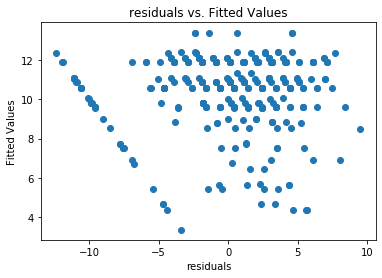

In [49]:
student_data_infl = reg_full_model.get_influence()
#residuals v.s. fitted values
residuals = student_data_infl.resid
grades_fitted = reg_full_model.fittedvalues
plt.scatter(residuals,grades_fitted)
plt.xlabel("residuals")
plt.ylabel("Fitted Values")
plt.title("residuals vs. Fitted Values")

#### Points bounce around the zero line as expected

### Heteroscedasticity check - Breusch Pagan test

In [50]:
from statsmodels.stats.diagnostic import het_breuschpagan
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

In [51]:
bp_test_student_data = het_breuschpagan(reg_full_model.resid, reg_full_model.model.exog)
print(dict(zip(labels, bp_test_student_data)))

{'LM Statistic': 7.6017722034593564, 'LM-Test p-value': 0.26875358727667853, 'F-Statistic': 1.2689822408920401, 'F-Test p-value': 0.27068005213544744}


p-value > alpha =0.05 => we do not have enough evidence to reject the null hypothesis. Hence the model does not have heteroscedasticity

### Autocorrelation check - Breusch-Godfrey test. 

In [52]:
bg_test_students =sm.stats.diagnostic.acorr_breusch_godfrey(reg_full_model)
labels_bg = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels_bg, bg_test_students)))

{'LM Statistic': 21.99371093565271, 'LM-Test p-value': 0.14339471573993942, 'F-Statistic': 1.3707963881334675, 'F-Test p-value': 0.1530747967088018}


p-value > alpha =0.05 => we do not have enough evidence to reject the null hypothesis. Hence the model does not have an autocorrelation problem

### Influential points

In [53]:
student_data_infl = reg_full_model.get_influence()

#### using internally studentized residuals

In [54]:
#threshold internally studentized residuals
import scipy
n_students = student_data.shape[0]
p_students = 7
seuil_stud = scipy.stats.t.ppf(0.975,df=n_students-p_students)

#detection - absolute value > threshold
atyp_stud = np.abs(student_data_infl.resid_studentized_internal) > seuil_stud
#which ones?
print(student_data.index[atyp_stud],student_data[atyp_stud])

Int64Index([131, 134, 135, 136, 140, 148, 168, 198, 221, 239, 242, 244, 259,
            260, 264, 269, 296, 316, 332, 333, 334, 337, 341, 383, 387, 389],
           dtype='int64')     sex famsize Pstatus famsup  studytime  failures romantic  goout  absences  \
131   F     GT3       T    yes          1         0      yes      3         0   
134   M     GT3       T    yes          2         0      yes      3         0   
135   F     GT3       T    yes          3         0      yes      3         0   
136   M     GT3       T     no          2         0       no      5         0   
140   M     GT3       T    yes          4         0       no      2         0   
148   M     GT3       T    yes          1         0      yes      2         0   
168   F     GT3       T    yes          2         0       no      5         0   
198   F     GT3       T    yes          1         1       no      4        24   
221   F     GT3       T    yes          3         1      yes      4         0   
239   M  

#### using externally studentized residuals

In [55]:
t_val_students = scipy.stats.t.ppf(0.975,df=n_students-p_students-1)

#detection - absolute value > threshold
suspicious_external_studs = np.abs(student_data_infl.resid_studentized_external) > t_val_students
#which ones?
print(student_data.index[suspicious_external_studs],student_data[suspicious_external_studs])

Int64Index([131, 134, 135, 136, 140, 148, 168, 198, 221, 239, 242, 244, 259,
            260, 264, 269, 296, 316, 332, 333, 334, 337, 341, 383, 387, 389],
           dtype='int64')     sex famsize Pstatus famsup  studytime  failures romantic  goout  absences  \
131   F     GT3       T    yes          1         0      yes      3         0   
134   M     GT3       T    yes          2         0      yes      3         0   
135   F     GT3       T    yes          3         0      yes      3         0   
136   M     GT3       T     no          2         0       no      5         0   
140   M     GT3       T    yes          4         0       no      2         0   
148   M     GT3       T    yes          1         0      yes      2         0   
168   F     GT3       T    yes          2         0       no      5         0   
198   F     GT3       T    yes          1         1       no      4        24   
221   F     GT3       T    yes          3         1      yes      4         0   
239   M  

#### using leverage

In [56]:
students_leverage = student_data_infl.hat_matrix_diag
suspicious_students_leverage = np.abs(students_leverage) > (3*p_students)/n_students
#which ones?
print(student_data.index[suspicious_students_leverage],student_data[suspicious_students_leverage])

Int64Index([], dtype='int64') Empty DataFrame
Columns: [sex, famsize, Pstatus, famsup, studytime, failures, romantic, goout, absences, Dalc, traveltime, paid, schoolsup, G3, null]
Index: []


#### using DFFITS

In [57]:
students_dffits = student_data_infl.dffits
suspicious_students_dffits = np.abs(students_dffits[0]) > 2*(((p_students+1)/(n_students-p_students-1))**(1/2))
#which ones?
print(student_data.index[suspicious_students_dffits],student_data[suspicious_students_dffits])

Int64Index([  2,  47, 130, 131, 134, 135, 136, 140, 148, 157, 198, 221, 242,
            244, 259, 264, 293, 303, 334, 376, 387],
           dtype='int64')     sex famsize Pstatus famsup  studytime  failures romantic  goout  absences  \
2     F     LE3       T     no          2         3       no      2        10   
47    M     GT3       T     no          4         0       no      2         4   
130   F     GT3       T    yes          3         2      yes      2         0   
131   F     GT3       T    yes          1         0      yes      3         0   
134   M     GT3       T    yes          2         0      yes      3         0   
135   F     GT3       T    yes          3         0      yes      3         0   
136   M     GT3       T     no          2         0       no      5         0   
140   M     GT3       T    yes          4         0       no      2         0   
148   M     GT3       T    yes          1         0      yes      2         0   
157   F     GT3       T    yes    

#### using Cook's distance

In [58]:
student_cooks = student_data_infl.cooks_distance
suspicious_student_cooks = np.abs(student_cooks[0]) > 4/(n_students-p_students)
#which ones?
print(student_data.index[suspicious_student_cooks],student_data[suspicious_student_cooks])

Int64Index([  2,  47, 128, 130, 131, 134, 135, 136, 140, 148, 157, 170, 198,
            221, 239, 242, 244, 259, 264, 293, 303, 314, 334, 338, 341, 367,
            376, 387],
           dtype='int64')     sex famsize Pstatus famsup  studytime  failures romantic  goout  absences  \
2     F     LE3       T     no          2         3       no      2        10   
47    M     GT3       T     no          4         0       no      2         4   
128   M     GT3       T    yes          1         2       no      3         0   
130   F     GT3       T    yes          3         2      yes      2         0   
131   F     GT3       T    yes          1         0      yes      3         0   
134   M     GT3       T    yes          2         0      yes      3         0   
135   F     GT3       T    yes          3         0      yes      3         0   
136   M     GT3       T     no          2         0       no      5         0   
140   M     GT3       T    yes          4         0       no      2 

### Influential points :

In [59]:
merged_student_susp = set(student_data.index[atyp_stud])
merged_student_susp = merged_student_susp.union(set(student_data.index[suspicious_external_studs]))
merged_student_susp = merged_student_susp.union(set(student_data.index[suspicious_students_dffits]))
merged_student_susp = merged_student_susp.union(set(student_data.index[suspicious_student_cooks]))
list(merged_student_susp)

[128,
 2,
 131,
 259,
 260,
 134,
 135,
 136,
 264,
 387,
 389,
 140,
 269,
 130,
 148,
 157,
 293,
 168,
 296,
 170,
 47,
 303,
 314,
 316,
 198,
 332,
 333,
 334,
 337,
 338,
 341,
 221,
 239,
 367,
 242,
 244,
 376,
 383]

### Influence Plot

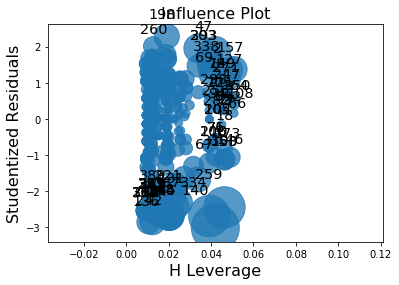

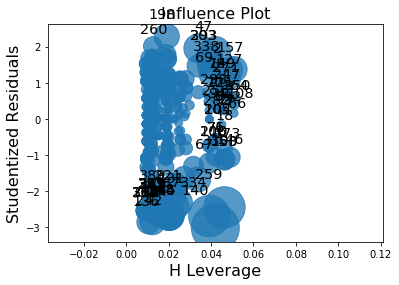

In [60]:
#graphical representation of the influences()
sm.graphics.influence_plot(reg_full_model)

##  Fitted model after removing influential points

In [61]:
students_not_influential = student_data.drop(list(merged_student_susp))

#### summary

In [62]:
reg_not_influential =  smf.ols('G3~ C(sex) + failures + C(romantic) + C(studytime)', data=students_not_influential).fit()
reg_not_influential.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     19.98
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           5.22e-20
Time:                        21:15:28   Log-Likelihood:                -880.00
No. Observations:                 347   AIC:                             1774.
Df Residuals:                     340   BIC:                             1801.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.0930      0.441     25.143      0.000      10.225      11.961
C(sex)[T.M]            1.2845      0.355      3.618      0.000       0.586       1.983
C(romantic)[T.yes]    -0.5250      0.360     -1.458      0.146      -1.233       0.183
C(studytime)[T.2]     -0.0146      0.416     -0.035      0.972      -0.832       0.803
C(studytime)[T.3]      1.6456      0.566      2.907      0.004       0.532       2.759
C(studytime)[T.4]      0.1608      0.778      0.207      0.836      -1.370       1.691
failures              -2.2537      0.245     -9.189      0.000      -2.736      -1.771
==============================================================================
Omnibus:                        5.618   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                4.019
Skew:                          -0.123   Prob(JB):                        0.134
Kurtosis:                       2.534   Cond. No.                         7.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ANOVA table

In [63]:
anova_not_influential = sm.stats.anova_lm(reg_not_influential, typ=2)
anova_not_influential

,sum_sq,df,F,PR(>F)
C(sex),124.785555,1.0,13.092724,3.414508e-04
C(romantic),20.259783,1.0,2.125693,1.457703e-01
C(studytime),118.013781,3.0,4.127406,6.791673e-03
failures,804.694516,1.0,84.429992,4.035975e-18
Residual,3240.508826,340.0,NaN,NaN


## Fitted Model without removing influential points

In [64]:
reg_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     11.67
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           5.25e-12
Time:                        21:15:28   Log-Likelihood:                -1097.7
No. Observations:                 385   AIC:                             2209.
Df Residuals:                     378   BIC:                             2237.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.5740      0.579     18.271      0.000       9.436      11.712
C(sex)[T.M]            1.3041      0.464      2.811      0.005       0.392       2.216
C(romantic)[T.yes]    -1.0021      0.466     -2.152      0.032      -1.918      -0.086
C(studytime)[T.2]      0.0191      0.545      0.035      0.972      -1.052       1.091
C(studytime)[T.3]      1.5086      0.733      2.059      0.040       0.068       2.949
C(studytime)[T.4]      0.4646      0.943      0.493      0.623      -1.390       2.319
failures              -2.0732      0.304     -6.811      0.000      -2.672      -1.475
==============================================================================
Omnibus:                       33.422   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.688
Skew:                          -0.739   Prob(JB):                     2.41e-09
Kurtosis:                       3.537   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
anova_full_model = sm.stats.anova_lm(reg_full_model, typ=2)
anova_full_model

,sum_sq,df,F,PR(>F)
C(sex),141.236890,1.0,7.904001,5.189537e-03
C(romantic),82.749346,1.0,4.630879,3.203424e-02
C(studytime),108.584220,3.0,2.025556,1.098576e-01
failures,828.972569,1.0,46.391563,3.826003e-11
Residual,6754.496075,378.0,NaN,NaN


#### After removing influential points, romantic has become insignificant and the p-values for other predictors have also changed indicating the points were highly influential

### VIF test

#### failures

In [66]:
failures_reg_vif = smf.ols('failures ~ C(sex) + C(romantic) + C(studytime)', data=student_data).fit()
failures_reg_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               failures   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     3.613
Date:                Sun, 13 Oct 2019   Prob (F-statistic):            0.00333
Time:                        21:15:28   Log-Likelihood:                -413.23
No. Observations:                 385   AIC:                             838.5
Df Residuals:                     379   BIC:                             862.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4624      0.095      4.881      0.000       0.276       0.649
C(sex)[T.M]           -0.0082      0.078     -0.104      0.917      -0.162       0.146
C(romantic)[T.yes]     0.1889      0.078      2.422      0.016       0.036       0.342
C(studytime)[T.2]     -0.2342      0.091     -2.569      0.011      -0.413      -0.055
C(studytime)[T.3]     -0.3096      0.123     -2.524      0.012      -0.551      -0.068
C(studytime)[T.4]     -0.4573      0.157     -2.905      0.004      -0.767      -0.148
==============================================================================
Omnibus:                      187.596   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              705.230
Skew:                           2.266   Prob(JB):                    7.27e-154
Kurtosis:                       7.839   Cond. No.                         6.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
failures_vif = 1/(1 - 0.043)
failures_vif ## no multicollinearity problem

1.044932079414838

#### sex

In [68]:
##dummy coding
vif_sex_data = student_data.copy()
vif_sex_data['sex_female'] = 1
vif_sex_data.loc[(vif_sex_data.sex == 'M'),'sex_female'] = 0

In [69]:
vif_sex_data.head()

,sex,famsize,Pstatus,famsup,studytime,failures,romantic,goout,absences,Dalc,traveltime,paid,schoolsup,G3,null,sex_female
0,F,GT3,A,no,2,0,no,4,6,1,2,no,yes,6,1,1
1,F,GT3,T,yes,2,0,no,3,4,1,1,no,no,6,1,1
2,F,LE3,T,no,2,3,no,2,10,2,1,yes,yes,10,1,1
3,F,GT3,T,yes,3,0,yes,2,2,1,1,yes,no,15,1,1
4,F,GT3,T,yes,2,0,no,2,4,1,1,yes,no,10,1,1


In [70]:
sex_reg_vif = smf.ols('sex_female ~ failures + C(romantic) + C(studytime)', data=vif_sex_data).fit()
sex_reg_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sex_female   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     11.74
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           1.45e-10
Time:                        21:15:28   Log-Likelihood:                -251.02
No. Observations:                 385   AIC:                             514.0
Df Residuals:                     379   BIC:                             537.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2389      0.051      4.705      0.000       0.139       0.339
C(romantic)[T.yes]     0.0650      0.051      1.263      0.207      -0.036       0.166
C(studytime)[T.2]      0.3084      0.058      5.297      0.000       0.194       0.423
C(studytime)[T.3]      0.5240      0.077      6.844      0.000       0.373       0.675
C(studytime)[T.4]      0.3785      0.103      3.688      0.000       0.177       0.580
failures               0.0035      0.034      0.104      0.917      -0.063       0.070
==============================================================================
Omnibus:                     8419.613   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.223
Skew:                          -0.138   Prob(JB):                     3.70e-08
Kurtosis:                       1.566   Cond. No.                         6.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
sex_vif = 1/(1 - 0.139)
sex_vif ## no multicollinearity problem

1.1614401858304297

#### romantic

In [72]:
##dummy coding
vif_romantic_data = student_data.copy()
vif_romantic_data['is_romantic'] = 1
vif_romantic_data.loc[(vif_sex_data.romantic == 'no'),'is_romantic'] = 0

In [73]:
vif_romantic_data.head()

,sex,famsize,Pstatus,famsup,studytime,failures,romantic,goout,absences,Dalc,traveltime,paid,schoolsup,G3,null,is_romantic
0,F,GT3,A,no,2,0,no,4,6,1,2,no,yes,6,1,0
1,F,GT3,T,yes,2,0,no,3,4,1,1,no,no,6,1,0
2,F,LE3,T,no,2,3,no,2,10,2,1,yes,yes,10,1,0
3,F,GT3,T,yes,3,0,yes,2,2,1,1,yes,no,15,1,1
4,F,GT3,T,yes,2,0,no,2,4,1,1,yes,no,10,1,0


In [74]:
romantic_reg_vif = smf.ols('is_romantic ~ failures + C(sex) + C(studytime)', data=vif_romantic_data).fit()
romantic_reg_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            is_romantic   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.697
Date:                Sun, 13 Oct 2019   Prob (F-statistic):            0.00280
Time:                        21:15:28   Log-Likelihood:                -249.54
No. Observations:                 385   AIC:                             511.1
Df Residuals:                     379   BIC:                             534.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2646      0.062      4.242      0.000       0.142       0.387
C(sex)[T.M]          -0.0645      0.051     -1.263      0.207      -0.165       0.036
C(studytime)[T.2]     0.1053      0.060      1.759      0.079      -0.012       0.223
C(studytime)[T.3]     0.1898      0.080      2.366      0.018       0.032       0.348
C(studytime)[T.4]    -0.0585      0.104     -0.562      0.574      -0.263       0.146
failures              0.0807      0.033      2.422      0.016       0.015       0.146
==============================================================================
Omnibus:                     3176.265   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.876
Skew:                           0.631   Prob(JB):                     4.46e-13
Kurtosis:                       1.603   Cond. No.                         7.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
romantic_vif = 1/(1 - 0.044)
romantic_vif ## no multicollinearity problem

1.0460251046025104

### Predictions

In [76]:
reg_full_model.predict(test_data[['sex','failures', 'romantic', 'studytime']])

162     9.804970
288    13.386726
144     5.658607
17     10.593182
119    11.878151
211    10.895219
263    12.082611
88      9.824116
218    10.574036
206     4.373638
dtype: float64

### RMSE VALUE

In [77]:
# Full model
((sum(test_data['G3']- reg_full_model.predict(test_data[['sex','failures', 'romantic', 'studytime']]))**2)/10)**0.5

4.765949996307959

In [78]:
# Without the influential
((sum(test_data['G3']- reg_not_influential.predict(test_data[['sex','failures', 'romantic', 'studytime']]))**2)/10)**0.5

6.108098123294167

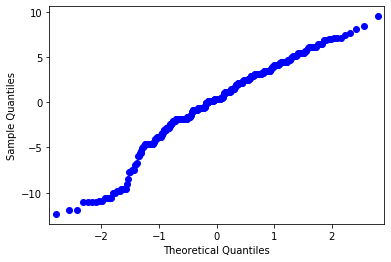

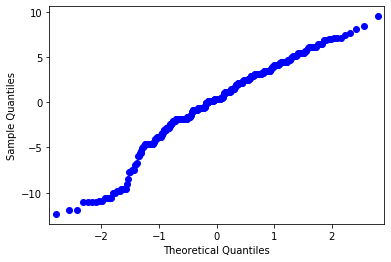

In [79]:
#qq plot
sm.qqplot(reg_full_model.resid)